In [3]:
import geopandas as gpd
import time
from matplotlib import pyplot as plt

In [5]:
pwd

'/Users/jianglix/Dropbox/xiaojiang/Teaching/Penn/AI-Urban-Sustainability/ai-urban-sustainability/secondlab'

In [9]:
# ls data/

In [11]:
t0 = time.time()
# geopandas will read the shapefile into a data frame with the geometric information
accident = gpd.read_file("data/crash_data_collision_crash_2007_2017.shp")
print(time.time() - t0)

67.87391114234924


In [13]:
type(accident)

geopandas.geodataframe.GeoDataFrame

In [14]:
accident.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

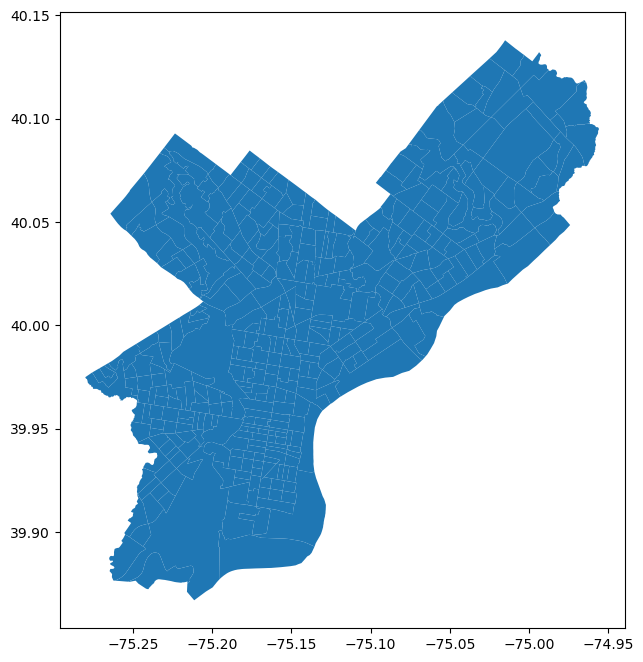

In [15]:
fig, ax = plt.subplots(1, figsize=(8, 8))

shpfile = 'data/census-tract-data.shp'
gpddf = gpd.read_file(shpfile)
gpddf.plot(ax=ax)

In [16]:
accident_reprojected = accident.to_crs('EPSG:2272')

accident_reprojected.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (2721960.974 277220.186)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (2747141.176 285071.603)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (2684583.629 244147.418)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (2677647.273 266032.243)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (2691142.089 235591.622)


In [17]:
accident_reprojected.crs

<Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [22]:
accident_2015 = accident_reprojected.loc[accident_reprojected['crash_year'] == 2015] #locate the traffic accident in 2015
accident_2015.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
22660,None,22661,274853,2015028828,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9765,-75.1894,None,None,POINT (2686025.602 244699.413)
22661,None,22662,274856,2015030569,6,67,67301,2015,2,4,...,0,0,0,4,0,40.0371,-75.1657,None,None,POINT (2692019.003 266959.013)
22662,None,22663,274862,2015038631,6,67,67301,2015,3,5,...,0,0,0,4,0,40.0275,-75.0800,None,None,POINT (2716110.749 264177.352)
22663,None,22664,274891,2015025058,6,67,67301,2015,2,3,...,0,0,0,4,0,39.9238,-75.2397,None,None,POINT (2672480.100 225104.757)
22664,None,22665,274898,2015033754,6,67,67301,2015,2,7,...,0,0,0,8,0,40.0719,-75.0296,None,None,POINT (2729720.416 280774.625)


In [24]:
censusMap = gpd.read_file("data/census-tract-data.shp")

censusMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

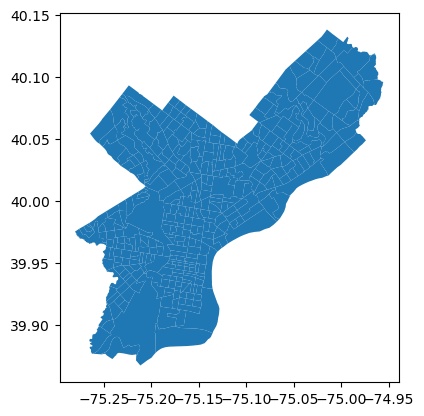

In [64]:
censusMap.plot()

In [25]:
# because two shapefiles are in the same projection, we can do spatial intersect
joined = gpd.sjoin(accident_2015, censusMap, how='left', op='intersects')
print(joined.head())

/opt/anaconda3/envs/geospatial/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/71/pbz44c1s167ggg_nfc4s_c480000gq/T/ipykernel_9118/18284572.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2272
Right CRS: EPSG:4269

  joined = gpd.sjoin(accident_2015, censusMap, how='left', op='intersects')


      county_nam  objectid_1  objectid         crn  district  county_left  \
22660       None       22661    274853  2015028828         6           67   
22661       None       22662    274856  2015030569         6           67   
22662       None       22663    274862  2015038631         6           67   
22663       None       22664    274891  2015025058         6           67   
22664       None       22665    274898  2015033754         6           67   

       municipali  crash_year  crash_mont  day_of_wee  ...  male85_  \
22660       67301        2015           2           1  ...      NaN   
22661       67301        2015           2           4  ...      NaN   
22662       67301        2015           3           5  ...      NaN   
22663       67301        2015           2           3  ...      NaN   
22664       67301        2015           2           7  ...      NaN   

       fema_65_66  fema_67_69  fema70_74  fema75_79  fema80_84  fema85_ state  \
22660         NaN         NaN

In [26]:
import fiona
import shapely

In [27]:
# get the meta data of shapefile, such as spatial reference, field names, etc
import fiona
from fiona.crs import to_string
from shapely.geometry import mapping, shape

neighborhood_shp = 'data/census-tract-data.shp'

with fiona.open(neighborhood_shp, 'r') as nb_lyr:
    driver = nb_lyr.driver # the driver of the shapefile
    schema = nb_lyr.schema  #schema of shapefile
    crs = nb_lyr.crs   # coordinate reference system of the shapefile
    meta = nb_lyr.meta # more details about the metadata of the shapefile

In [32]:
schema['geometry']

'Polygon'

In [39]:
schema['properties']

{'STATEFP': 'str:80',
 'COUNTYFP': 'str:80',
 'TRACTCE': 'str:80',
 'GEOID': 'str:80',
 'NAME_x': 'str:80',
 'NAMELSAD': 'str:80',
 'MTFCC': 'str:80',
 'FUNCSTAT': 'str:80',
 'ALAND': 'int:18',
 'AWATER': 'int:18',
 'INTPTLAT': 'str:80',
 'INTPTLON': 'str:80',
 'NAME_y': 'str:80',
 'GEO_ID': 'str:80',
 'white_popu': 'str:80',
 'non-hispan': 'str:80',
 'black_popu': 'str:80',
 'asian_popu': 'str:80',
 'hispanic_p': 'str:80',
 'total_popu': 'str:80',
 'median_hou': 'str:80',
 'per_capita': 'str:80',
 'built_age': 'str:80',
 'less_highs': 'str:80',
 'bachelor': 'str:80',
 'totaleduca': 'str:80',
 'male_und18': 'str:80',
 'female_und': 'str:80',
 'male65_66': 'str:80',
 'male67_69': 'str:80',
 'male70_74': 'str:80',
 'male75_79': 'str:80',
 'male80_84': 'str:80',
 'male85_': 'str:80',
 'fema_65_66': 'str:80',
 'fema_67_69': 'str:80',
 'fema70_74': 'str:80',
 'fema75_79': 'str:80',
 'fema80_84': 'str:80',
 'fema85_': 'str:80',
 'state': 'str:80',
 'county': 'str:80',
 'tract': 'str:80'}

In [36]:
crs

CRS.from_epsg(4269)

In [42]:
with fiona.open(neighborhood_shp, 'r') as nb_lyr:
    for feat in nb_lyr:
        # attribute of the neighborhood features
        attr = feat['properties']
        name = attr['total_popu']  #you can find other attribute based on the metadata of the shapefile
        print ('The total_popu is:', name)
        
        # get the geometry of the polygon feature
        geom = feat['geometry']
#         print ('geom is:', geom)
   

The total_popu is: 1694
The total_popu is: 5590
The total_popu is: 5239
The total_popu is: 3075
The total_popu is: 7070
The total_popu is: 5530
The total_popu is: 3239
The total_popu is: 3307
The total_popu is: 5048
The total_popu is: 24
The total_popu is: 3928
The total_popu is: 6748
The total_popu is: 3459
The total_popu is: 4067
The total_popu is: 409
The total_popu is: 3894
The total_popu is: 5336
The total_popu is: 2893
The total_popu is: 4632
The total_popu is: 5152
The total_popu is: 4080
The total_popu is: 4590
The total_popu is: 3733
The total_popu is: 5199
The total_popu is: 3331
The total_popu is: 2837
The total_popu is: 521
The total_popu is: 4166
The total_popu is: 2576
The total_popu is: 3444
The total_popu is: 3341
The total_popu is: 2468
The total_popu is: 3109
The total_popu is: 2540
The total_popu is: 3880
The total_popu is: 5841
The total_popu is: 5838
The total_popu is: 4427
The total_popu is: 2493
The total_popu is: 1350
The total_popu is: 1802
The total_popu is: 2

In [43]:
geom

In [47]:
crs

CRS.from_epsg(4269)

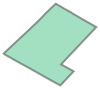

In [45]:
shape(geom)


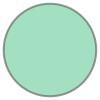

In [46]:
shape(geom).buffer(10)


In [48]:
from pyproj import Transformer
from shapely.ops import transform

# Define a transformer to convert from EPSG:4326 to EPSG:3857
transformer = Transformer.from_crs("EPSG:4269", "EPSG:2272", always_xy=True)

# Reproject the geometry
reprojected_geom = transform(transformer.transform, shape(geom))

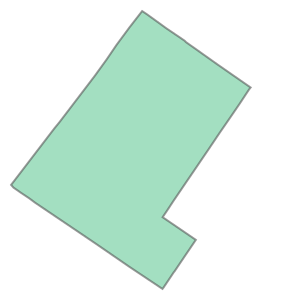

In [49]:
reprojected_geom

In [54]:
list(reprojected_geom.exterior.coords)

[(2721301.3271258767, 268155.0877364073),
 (2721478.3376927422, 268386.0756604182),
 (2721635.9377122046, 268592.0551701313),
 (2721822.10216912, 268834.98717924685),
 (2721907.243314183, 268945.8247873837),
 (2721971.7888170057, 269024.69191079796),
 (2721985.529047248, 269042.60452000855),
 (2722341.6151070553, 269509.3932479507),
 (2722469.0006342903, 269676.91832617356),
 (2722512.000289679, 269736.5425970876),
 (2722626.76568485, 269895.3011242064),
 (2722673.953320586, 269964.5292671286),
 (2722764.027946632, 270097.02334935666),
 (2722947.75273778, 270345.72136307764),
 (2723120.2519587926, 270567.4730201987),
 (2723127.392657482, 270562.9531698112),
 (2723184.864902198, 270524.6183055685),
 (2723456.119902337, 270328.44490818866),
 (2723709.5516535016, 270156.51253748225),
 (2723731.219228403, 270134.94301178044),
 (2723939.6478238734, 269987.513884494),
 (2724163.5584488525, 269828.532849027),
 (2724626.063500433, 269507.01685309387),
 (2724603.670699001, 269478.9977490016),
 

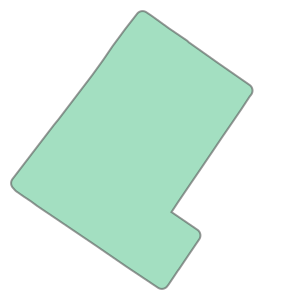

In [55]:
reprojected_geom.buffer(100)


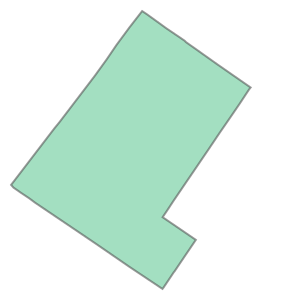

In [56]:
reprojected_geom

In [60]:
import pandas
coffee_shop_sheet = pandas.read_csv('data/cambridge_coffee_shops.csv')

In [62]:
coffee_shop_sheet

,id,name,address,city,state,zip,lat,lon
0,1,1369 Coffee House,1369 Cambridge St,Cambridge,MA,2139,42.373695,-71.100440
1,2,1369 Coffee House,757 Massachusetts Ave,Cambridge,MA,2139,42.366432,-71.105430
2,3,Aceituna Cafe,605 W Kendall St,Cambridge,MA,2142,42.364370,-71.081924
3,4,Al's Deli Cafe-Cambridge,1354 Massachusetts Ave,Cambridge,MA,2138,42.373238,-71.118340
4,5,Algiers Coffee House,40 Brattle St # 3,Cambridge,MA,2138,42.373840,-71.121380
...,...,...,...,...,...,...,...,...
78,78,Voltage Coffee & Art,295 3rd St,Cambridge,MA,2142,42.365280,-71.082670
79,79,Wu Healing Ctr,740 Cambridge St,Cambridge,MA,2141,42.372208,-71.089140
80,81,Simon's Coffee Shop,1736 Massachusetts Ave,Cambridge,MA,2138,42.384598,-71.119738
81,82,Starbucks,699 Mount Auburn Street,Cambridge,MA,2138,42.375159,-71.148877


In [63]:
from shapely.geometry import Point, mapping

# prepare the schema and crs of the output shapefile
schema = {
    'geometry': 'Point',
    'properties': {
        'id': 'str: 20',
        'name': 'str: 20',
        'address': 'str: 20',
        'city': 'str: 20',
        'state':'str: 20',
        'zip': 'str: 7'
    }
}

crs = {'init': u'epsg:4326'}

# The output shapefile
coffee_shop_shp = 'data/cambridge_coffee_shops2.shp' 

with fiona.open(coffee_shop_shp, 'w', driver = "ESRI Shapefile", crs = crs, schema=schema) as output:
    for row in coffee_shop_sheet.iterrows():
        lon = row[1][7]
        lat = row[1][6]
        
        id_ = row[1][0]
        name = row[1][1]
        address = row[1][2]
        city = row[1][3]
        state = row[1][4]
        zipcode = row[1][5]
        
        point = Point(float(lon), float(lat))
        output.write({'properties':{'id': id_,
                                    'name': name,
                                    'address': address,
                                    'city': city,
                                    'state': state,
                                    'zip': zipcode
                                    },
                      'geometry': mapping(point)
                     })
        
print ('You have export the shapefile successfully')

You have export the shapefile successfully
